In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import numpy as np 
import cv2
import os
import pandas as pd

In [32]:
#Image Display
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [17]:
from keras.models import load_model

In [33]:
#Generator
# from tensorflow.keras import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Loding Pre-trained Weights of ImageNet 
from keras.applications.vgg16 import preprocess_input
# Data Augmentation parameteres
datagen_train = ImageDataGenerator(preprocessing_function= preprocess_input,rescale = 1./255.,horizontal_flip=True,shear_range=0.2, rotation_range=5,
                                  brightness_range=[0.1, 2], zoom_range=0.2, validation_split=0.1)


In [34]:
generator_train=datagen_train.flow_from_directory(
      '/content/drive/MyDrive/intel-image-classification/seg_train/seg_train',
      target_size=(150,150), batch_size=64, class_mode='sparse', seed=2209,
      subset='training'
    
)

validation_generator=datagen_train.flow_from_directory(
      '/content/drive/MyDrive/intel-image-classification/seg_train/seg_train',
      target_size=(150,150),batch_size=64, class_mode='sparse', shuffle=False,
      seed=2209, subset='validation'
    
)

test_datagen = ImageDataGenerator(preprocessing_function= preprocess_input, rescale = 1./255.)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/intel-image-classification/seg_validation/seg_validation', 
    target_size=(150,150), batch_size=32, shuffle=False, class_mode='sparse',
    seed=2209
) 

pred_datagen = ImageDataGenerator(preprocessing_function= preprocess_input, rescale = 1./255.)
pred_generator = pred_datagen.flow_from_directory(
    '/content/drive/MyDrive/intel-image-classification/seg_pred/seg_pred/', 
    target_size=(150,150), batch_size=1, shuffle=False, class_mode='sparse',
    seed=2209
) 

test1_datagen = ImageDataGenerator(preprocessing_function= preprocess_input, rescale = 1./255.)
test1_generator = test1_datagen.flow_from_directory(
    '/content/drive/MyDrive/intel-image-classification/seg_validation/seg_validation', 
    target_size=(150,150), batch_size=1, class_mode=None, shuffle=False,
    seed=2209
) 


Found 12633 images belonging to 6 classes.
Found 1402 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7311 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [35]:
SEED = 2209
import os
import random as rn
import numpy as np
import tensorflow as tf
tf.random.set_seed(SEED) 

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)

rn.seed(SEED)

In [39]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 
from keras.applications.resnet50 import ResNet50
import keras

model = Sequential()
model.add(Conv2D(input_shape=(150,150,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=6, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 37, 37, 128)      

In [40]:
from keras.optimizers import SGD
reducelronp =tf. keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
sgd = SGD(lr=0.01, decay=1e-7, momentum=.9)
model.compile(optimizer=sgd,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1=model.fit_generator(
  generator_train,
  steps_per_epoch=int(12633/64),
  epochs=50,
  validation_data=validation_generator,
  validation_steps=int(1402/64),
  callbacks=[reducelronp],
  verbose=1
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
197/197 [==============================] - 145s 730ms/step - loss: 1.7896 - accuracy: 0.1850 - val_loss: 1.7542 - val_accuracy: 0.2738
Epoch 2/50
197/197 [==============================] - 143s 723ms/step - loss: 1.6895 - accuracy: 0.2865 - val_loss: 1.7369 - val_accuracy: 0.2753
Epoch 3/50
197/197 [==============================] - 143s 724ms/step - loss: 1.6068 - accuracy: 0.3470 - val_loss: 1.2103 - val_accuracy: 0.5082
Epoch 4/50
197/197 [==============================] - 143s 725ms/step - loss: 1.1811 - accuracy: 0.5257 - val_loss: 1.1029 - val_accuracy: 0.5506
Epoch 5/50
197/197 [==============================] - 143s 725ms/step - loss: 1.0550 - accuracy: 0.5769 - val_loss: 1.0871 - val_accuracy: 0.5402
Epoch 6/50
197/197 [==============================] - 143s 726ms/step - loss: 0.9690 - accuracy: 0.6115 - val_loss: 0.9498 - val_accuracy: 0.6458
Epoch 7/50
197/197 [==============================] - 143s 726ms/step - loss: 0.9151 - accuracy: 0.6359 - val_loss: 0.9476 -

In [41]:
accuracy=model.evaluate_generator(test_generator, steps=len(test_generator)//32, callbacks=[reducelronp],verbose=2)
print('Accuracy of the model on the validation set: ',accuracy[1])
accuracy1=model.evaluate_generator(pred_generator, steps=len(pred_generator), callbacks=[reducelronp],verbose=2)
print('Accuracy of the model on the Test set: ',accuracy1[1])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


2/2 - 0s - loss: 0.6832 - accuracy: 0.7812
Accuracy of the model on the validation set:  0.78125
7311/7311 - 4907s - loss: 0.4646 - accuracy: 0.8636
Accuracy of the model on the Test set:  0.8636301755905151


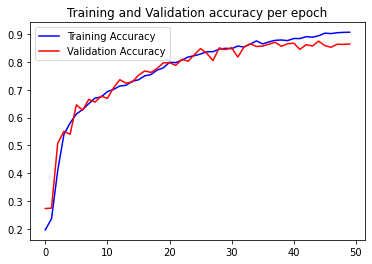

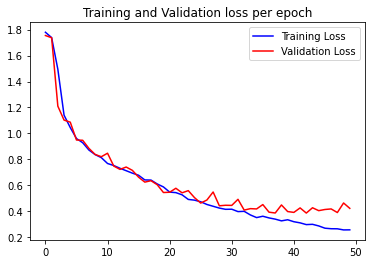

In [42]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['accuracy']
val_acc=history1.history['val_accuracy']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Training and Validation accuracy per epoch')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation loss per epoch')
plt.legend()
plt.show()

In [43]:
path = F"/content/drive/MyDrive/weights.h5" 
model.save(path)

In [45]:
filenames = pred_generator.filenames
nb_samples = len(filenames)
y_predict = model.predict_generator(pred_generator,steps = nb_samples)
from sklearn.metrics  import classification_report
print(classification_report(y_true=pred_generator.labels, y_pred=y_predict.argmax(axis=-1), target_names=['Building','Forest','Glacier','Mountain','Sea','Street']))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

    Building       0.91      0.82      0.87      1154
      Forest       0.96      0.98      0.97      1166
     Glacier       0.86      0.79      0.82      1330
    Mountain       0.82      0.78      0.80      1297
         Sea       0.80      0.89      0.85      1128
      Street       0.84      0.93      0.88      1236

    accuracy                           0.86      7311
   macro avg       0.87      0.87      0.86      7311
weighted avg       0.87      0.86      0.86      7311

